In [13]:
# By Joachim Harnois-Deraps, with inputs from Ben Giblin on the galaxy populatio algorithm, 
# and Nan Li on some lensing subroutines 
# Code illustrating extraction of shear from Mira Titan healpix maps

import numpy as np
import healpy as hp
#from scipy.interpolate import interp1d
import random
import input


# The tomographic bin
tomobin = 5

print("**************************")
print("Processing tomo bin",tomobin)
print("**************************")



# the number of galaxies per square arcminute to extract
gpam = 0.06
#gpam = 2.6    #LSST, per tomo bin
#gpam = 1.493  #KiDS tomo4
#gpam = 1.830  #KiDS tomo3
#gpam = 1.856  #KiDS tomo2
#gpam = 2.354  #KiDS tomo1

print('assigning %f gal/arcmin**2' % gpam)
#zs = 2.9412

# the number of galaxies to extract in the octant
ngal = int(gpam * (4.*np.pi/8.)*(180./np.pi)**2. *3600.)
print('for a total of %i galaxies' % ngal)

# The NSIDE value of the shear and weight maps
nside = 8192
#nside = 2048

npix = 12*nside**2
pix_size = np.sqrt(4.*np.pi*(180./np.pi*60)**2/npix)
print('pixel size of shear maps is %f arcmin per side' % pix_size)

#Create a n(z)
def total_area(x_in,y_in):
   x_down = x_in[:-1]
   x_up = x_in[1:]
   y_down = y_in[:-1]
   y_up = y_in[1:]
   area_array = (y_down+y_up)*(x_up-x_down)/2.0
   return np.sum(area_array)

def cal_pdz(z_in):
   zs,dist = np.loadtxt("./nofz.dat",comments='#',usecols=(0,1),unpack=True)
   dist_normal = dist/total_area(zs,dist)
   f1 = interp1d(zs, dist_normal, kind='cubic')
   return f1(z_in)

def IndexToDeclRa(index):
        theta,phi=hp.pixelfunc.pix2ang(nside,index,nest=False)
        return np.degrees(np.pi/2. - theta),np.degrees(phi)

**************************
Processing tomo bin 5
**************************
assigning 0.060000 gal/arcmin**2
for a total of 1113829 galaxies
pixel size of shear maps is 0.429436 arcmin per side


In [14]:
print("Reading in N(z) from tomobin  %d" % tomobin)
data = np.loadtxt('./Euclid_dndz_fu08_bin1-5.dat', usecols=(0,tomobin)) 

z_array = data[:,0]
pdz = data[:,1]
dz = z_array[41] - z_array[40]
n_zbins = np.size(pdz)

# Normalise:
pdz = pdz/sum(pdz)/dz
print("Check normalisation: sum n(z) dz = ",sum(pdz)*dz)
print("Mean redshift = ", np.dot(pdz,z_array)*dz)

Reading in N(z) from tomobin  5
Check normalisation: sum n(z) dz =  0.9999999999999996
Mean redshift =  1.8520806427544032


In [15]:
#construct cumulative distribution
cumul_dist = np.zeros(n_zbins)

#for z_bin in range(0,10):
for z_bin in range(0,n_zbins):
    #print z_array[z_bin], pdz[z_bin], sum(pdz[0:z_bin+1])
    cumul_dist[z_bin] = sum(pdz[0:z_bin+1])/sum(pdz)
    #print(z_array[z_bin], pdz[z_bin], cumul_dist[z_bin])

    #do ii =1,nbins_pdf
    #  if(rand .lt. cumul_dist(ii))then
    #     photo_bin = ii
    #     exit
    #  endif
    #enddo
    #print ran_array, np.mean(ran_array), np.std(ran_array)

print('Got cumul dist')

Got cumul dist


In [16]:
#draw the galaxies from this n(z) (This routine may take a few seconds to execute)
spec_z = np.zeros(ngal)

#for gal in range(0,20):
for gal in range(0,ngal):
    gal_bin = 0
    ran = random.uniform(0, 1)
    for z_bin in range(0,n_zbins):
        #print ran, cumul_dist[z_bin]
        if ran < cumul_dist[z_bin]:
            gal_bin = z_bin
            break
    #
    #print(gal, ran, cumul_dist[gal_bin-1], cumul_dist[gal_bin], gal_bin, z_bin)
    #
    #
    #randomize distribution within that bin
    ran2 = random.uniform(0,1)*dz
    spec_z[gal] = z_array[gal_bin]+ran2
    #spec_z[gal] = z_array[gal_bin]+dz
    #print( gal, gal_bin, z_array[gal_bin], spec_z[gal],z_array[gal_bin+1])


print('Assigned redshift to these galaxies')
print('-----------------------------------')

Assigned redshift to these galaxies
-----------------------------------


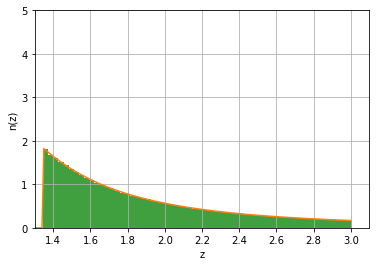

In [17]:
# Plot input n(z) vs galaxy histogram
import matplotlib.pyplot as plt
# the histogram of the data
n, bins, patches = plt.hist(spec_z, 60, density=True, facecolor='g',alpha=0.75)
plt.xlabel('z')
plt.ylabel('n(z)')
#plt.text(60, .025, r'tomobin 1')
plt.grid(True)

plt.plot(z_array+dz/2, pdz)
if tomobin==1: 
    plt.xlim(0, 0.5)
    plt.ylim(0, 4,0)
elif tomobin==2: 
    plt.xlim(0.45, 0.85)
    plt.ylim(0, 5,0)
elif tomobin==3: 
    plt.xlim(0.65, 1.05)
    plt.ylim(0, 5,0)
elif tomobin==4: 
    plt.xlim(0.95, 1.45)
    plt.ylim(0, 5,0)
elif tomobin==5: 
    plt.xlim(1.3, 3.10)
    plt.ylim(0, 5,0)








plt.show()




starting analysis of plane 0
z_lo - z_hi = 2.9412 3.0361
found 12381 galaxies between z=2.941200 and z=3.036100
reading weight file
Reading in weight map for Mira Titan


Reading in shear 1 back (zs = 3.036100)
Reading in shear 2 back (zs = 3.036100)


/tmp/ipykernel_4207/1182530762.py:79: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname1 = input.shearDir+np.str("{:5.4f}".format(z_back))+"gamma1.npy"
/tmp/ipykernel_4207/1182530762.py:80: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname2 = input.shearDir+np.str("{:5.4f}".format(z_back))+"gamma2.npy"


loaded gamma1
loaded gamma2
Reading in shear 1/2/kappa front (zs = 2.941200)


/tmp/ipykernel_4207/1182530762.py:109: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname1 = input.shearDir+np.str("{:5.4f}".format(z_front))+"gamma1.npy"
/tmp/ipykernel_4207/1182530762.py:110: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname2 = input.shearDir+np.str("{:5.4f}".format(z_front))+"gamma2.npy"
/tmp/ipykernel_4207/1182530762.py:111: Depreca

loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_487_dens.bin


/tmp/ipykernel_4207/1182530762.py:204: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname = path_in+'density_map_'+np.str(snaplist[plane])+'_dens.bin'


Got RING-ordered input map
Transformed from number count to over-density map


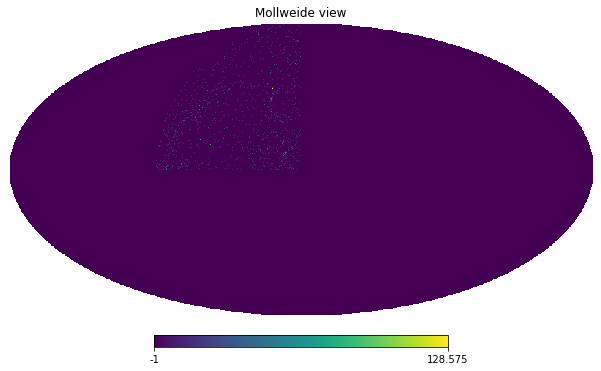

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(12373,) (12373,)
Max number of gal per pixel =  2
Found  (29,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(12402,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane0_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc


/tmp/ipykernel_4207/1182530762.py:295: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  outname = input.GalDir+'StageIV_nz/GalCat_tomo'+np.str(tomobin)+'_plane'+np.str(plane)+'_'+np.str(gpam)+'GpAM_RA_Dec_g1_g2_w_linear_bias.asc'


Done
starting analysis of plane 1
z_lo - z_hi = 2.8506 2.9412
found 18713 galaxies between z=2.850600 and z=2.941200
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.941200 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.850600)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_475_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


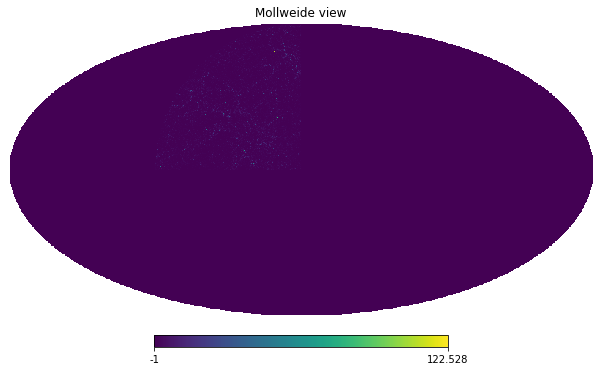

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(18848,) (18848,)
Max number of gal per pixel =  2
Found  (23,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(18871,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane1_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 2
z_lo - z_hi = 2.7361 2.8506
found 26526 galaxies between z=2.736100 and z=2.850600
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.850600 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.736100)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_464_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


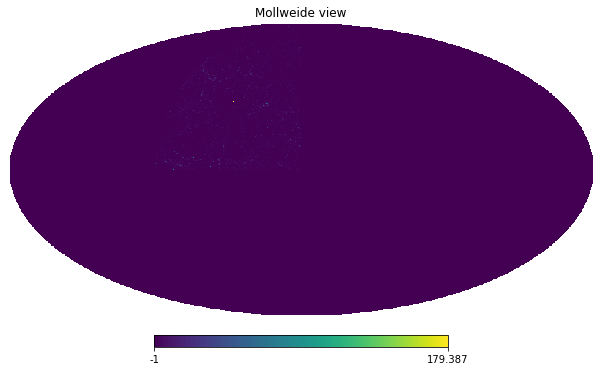

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(26239,) (26239,)
Max number of gal per pixel =  2
Found  (38,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(26277,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane2_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 3
z_lo - z_hi = 2.6545 2.7361
found 20651 galaxies between z=2.654500 and z=2.736100
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.736100 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.654500)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_453_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


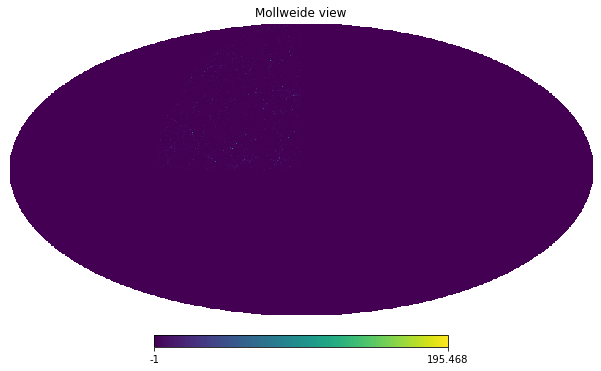

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(20774,) (20774,)
Max number of gal per pixel =  2
Found  (21,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(20795,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane3_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 4
z_lo - z_hi = 2.5765 2.6545
found 21484 galaxies between z=2.576500 and z=2.654500
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.654500 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.576500)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_442_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


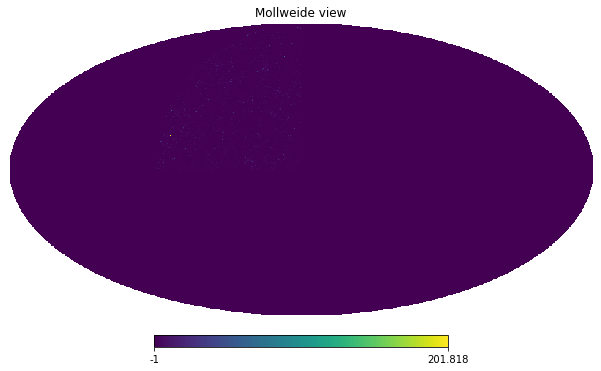

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(21519,) (21519,)
Max number of gal per pixel =  2
Found  (19,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(21538,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane4_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 5
z_lo - z_hi = 2.4775 2.5765
found 31020 galaxies between z=2.477500 and z=2.576500
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.576500 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.477500)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_432_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


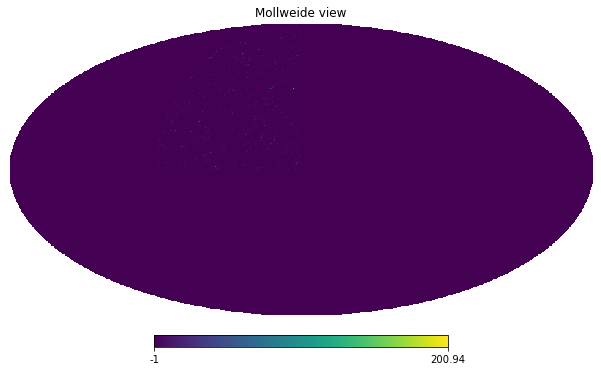

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(30869,) (30869,)
Max number of gal per pixel =  2
Found  (34,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(30903,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane5_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 6
z_lo - z_hi = 2.4068 2.4775
found 24194 galaxies between z=2.406800 and z=2.477500
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.477500 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.406800)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_421_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


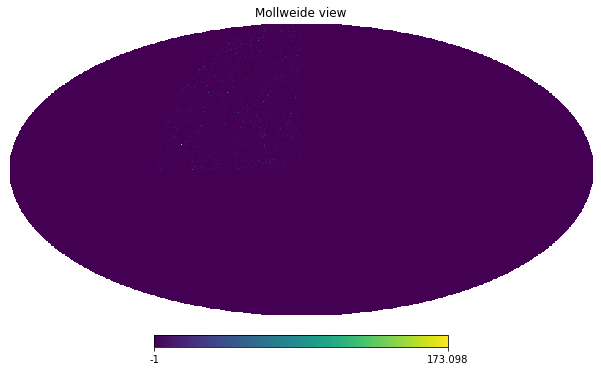

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(23982,) (23982,)
Max number of gal per pixel =  2
Found  (22,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(24004,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane6_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 7
z_lo - z_hi = 2.3168 2.4068
found 34121 galaxies between z=2.316800 and z=2.406800
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.406800 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.316800)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_411_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


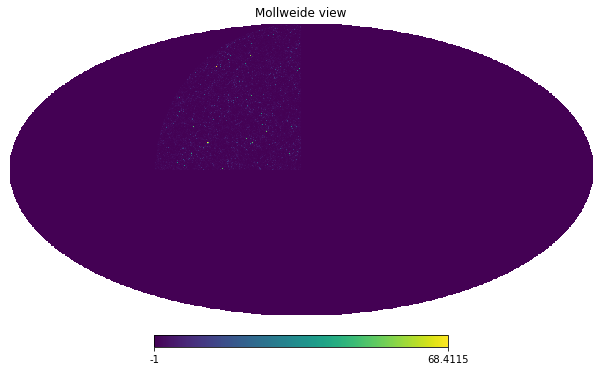

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(34075,) (34075,)
Max number of gal per pixel =  2
Found  (35,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(34110,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane7_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 8
z_lo - z_hi = 2.2524 2.3168
found 26963 galaxies between z=2.252400 and z=2.316800
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.316800 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.252400)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_401_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


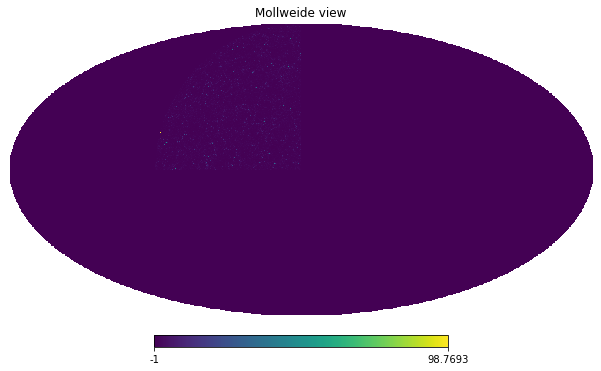

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  3
(26825,) (26825,)
Max number of gal per pixel =  3
Found  (26,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(26851,)
Found  (1,) pixels with more than  2 galaxies in it.
Adding these to the pixel data vector
(26852,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane8_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 9
z_lo - z_hi = 2.1703 2.2524
found 38355 galaxies between z=2.170300 and z=2.252400
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.252400 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.170300)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_392_dens.bin
Got RING-ordered input map
Transformed from number count to

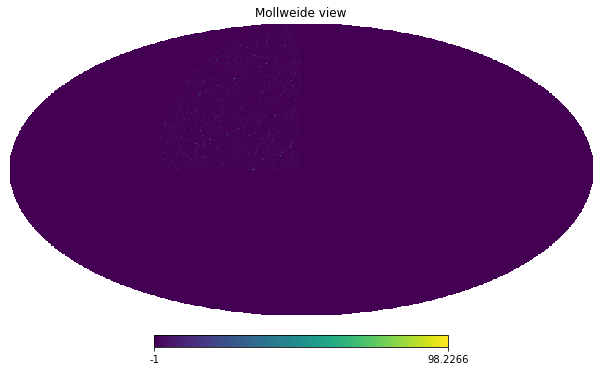

Transformed from over-density to galaxy density map
Enforced positivity everywhere
(38692,) (38692,)
Max number of gal per pixel =  2
Found  (37,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(38729,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane9_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 10
z_lo - z_hi = 2.0923 2.1703
found 40311 galaxies between z=2.092300 and z=2.170300
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.170300 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.092300)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_382_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


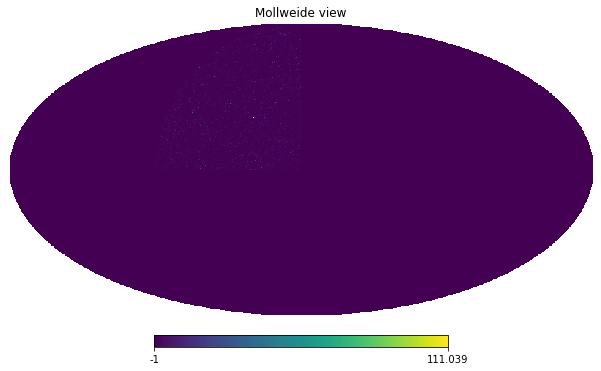

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(40367,) (40367,)
Max number of gal per pixel =  2
Found  (35,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(40402,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane10_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 11
z_lo - z_hi = 2.018 2.0923
found 43076 galaxies between z=2.018000 and z=2.092300
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.092300 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 2.018000)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_373_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


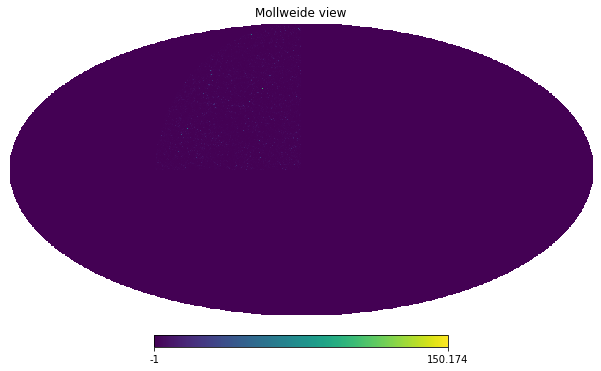

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(42912,) (42912,)
Max number of gal per pixel =  2
Found  (44,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(42956,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane11_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 12
z_lo - z_hi = 1.9472 2.018
found 45900 galaxies between z=1.947200 and z=2.018000
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 2.018000 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 1.947200)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_365_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


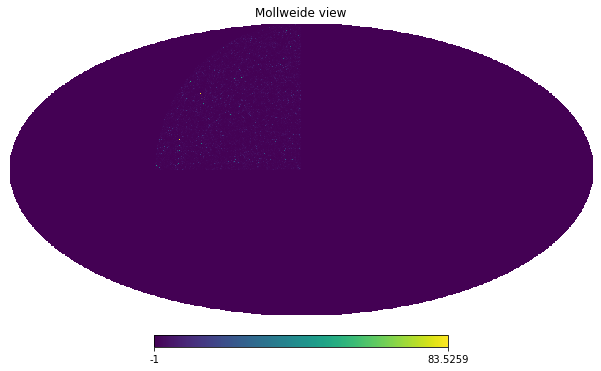

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(45686,) (45686,)
Max number of gal per pixel =  2
Found  (36,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(45722,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane12_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 13
z_lo - z_hi = 1.8797 1.9472
found 48724 galaxies between z=1.879700 and z=1.947200
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 1.947200 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 1.879700)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_355_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


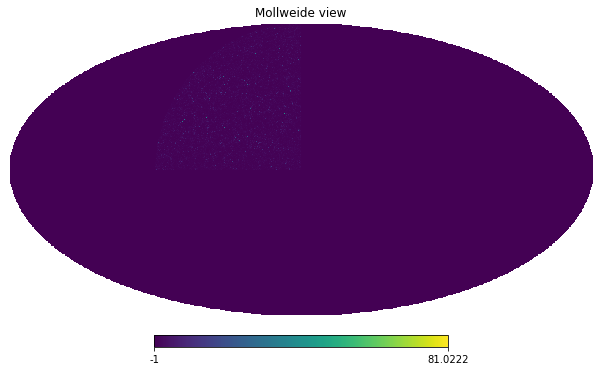

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  2
(48648,) (48648,)
Max number of gal per pixel =  2
Found  (39,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(48687,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane13_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 14
z_lo - z_hi = 1.7994 1.8797
found 65438 galaxies between z=1.799400 and z=1.879700
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 1.879700 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 1.799400)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_347_dens.bin
Got RING-ordered input map
Transformed from number count to over-density map


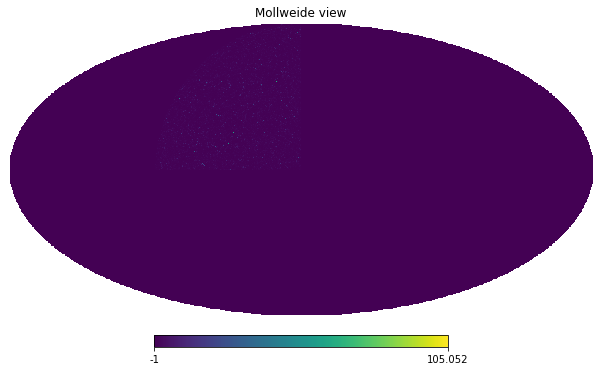

Transformed from over-density to galaxy density map
Enforced positivity everywhere
Poisson sampled the map
max Ngal per pixel =  3
(64948,) (64948,)
Max number of gal per pixel =  3
Found  (81,) pixels with more than  1 galaxies in it.
Adding these to the pixel data vector
(65029,)
Found  (2,) pixels with more than  2 galaxies in it.
Adding these to the pixel data vector
(65031,)
Wrinting IA-infusion/SkySim5000/GalCat/StageIV_nz/GalCat_tomo5_plane14_0.06GpAM_RA_Dec_g1_g2_w_linear_bias.asc
Done
starting analysis of plane 15
z_lo - z_hi = 1.7384 1.7994
found 55576 galaxies between z=1.738400 and z=1.799400
Found consecutive planes not empty, recycle planes to save IO:
Recycling map to reduce IO:, zs = 1.799400 was already loaded, now used as back plane
Reading in shear 1/2/kappa front (zs = 1.738400)
loaded gamma1
loaded gamma2
loading delta map:
Working on file /global/cfs/cdirs/lsst/groups/CS/mass_sheets/density_map_338_dens.bin
Got RING-ordered input map
Transformed from number count 

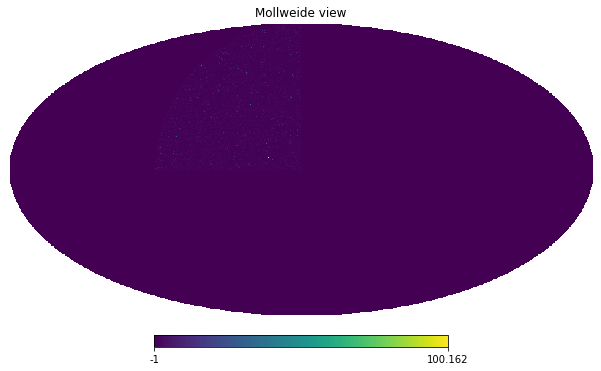

Transformed from over-density to galaxy density map
Enforced positivity everywhere


In [ ]:
import random


#find galaxies with shear planes i and j, load the maps, interpolate, loop over next maps
#z_list = np.loadtxt('list_zs.dat')

# Selection population option:
# 1 = randomly choose pixels from the unmasked section of the map
# 2 = randomly generate angular coords from the unmasked octant (more accurate than OPTION 1)
# 3 = load mass sheet and populate the galaxies following a linear biasing scheme
OPTION=3


zfile=np.loadtxt("z2ts.txt",delimiter=',')
snaplist = zfile[1:58,1].astype(int)
z_list=np.flip(zfile[1:58,0])

n_slices = np.size(z_list)
#print(zfile)
#print(z_list)

ngal_cur = np.zeros(n_slices, dtype=int)

ngal_analyzed = 0
weight_flag = 0
recycle_map_flag = 0

# Loop over all planes, starting from high redshift towards z=0
for plane in range(0,n_slices):
#for plane in range(0,n_slices):

    print('starting analysis of plane %i' % plane)
    z_back = z_list[plane]
    if plane == n_slices-1:
        z_front = 0.0
    else:
        z_front = z_list[plane+1]
    print('z_lo - z_hi =', z_front, z_back)
    gal_cur = np.where(np.logical_and(spec_z>z_front, spec_z<=z_back))
    ngal_cur[plane] = np.size(gal_cur)
    if ngal_cur[plane] == 0:
        print('no galaxies here, loop to next plane')
    else:
        print('found %s galaxies between z=%f and z=%f' % (ngal_cur[plane], z_front, z_back))
        ngal_analyzed = ngal_analyzed+ngal_cur[plane]
        #
        if ngal_cur[plane-1] >0:
            print("Found consecutive planes not empty, recycle planes to save IO:")
            recycle_map_flag = 1
            # Uncomment the above to enable recycling
            
        #Interpolate from shear maps onto redshift of the halo:
        #! dz1 (dz2) is fractional distance to plane behind (in front)
        #
        dz1 = z_back - spec_z[gal_cur]
        if plane == n_slices -1:
            dz2 = spec_z[gal_cur]
        else: 
            dz2 = spec_z[gal_cur] - z_front
        #
        dz1 = dz1/(dz1 + dz2)
        dz2 = 1. - dz1
        #
        #print(z_front, spec_z[gal_cur], z_back, dz1, dz2)
        
        if weight_flag == 0:
            print('reading weight file')
            weight_flag = 1
            print("Reading in weight map for Mira Titan")
            hpmap_weight = hp.fitsfunc.read_map('./IA-infusion/SkySim5000/FullSky_weight.fits', field=0,nest=False, partial=False, hdu=1, h=False, verbose=True, memmap=True)
            #
            # masking - not really necessary here, but just in case it is useful for something else.
            unmask = np.where(hpmap_weight > 0)[0]
            #
        if recycle_map_flag==0:
            print("Reading in shear 1 back (zs = %f)" % z_back)
            print("Reading in shear 2 back (zs = %f)" % z_back)
                       
            fname1 = input.shearDir+np.str("{:5.4f}".format(z_back))+"gamma1.npy"
            fname2 = input.shearDir+np.str("{:5.4f}".format(z_back))+"gamma2.npy"
            #fname3 = input.kappaDir+np.str("{:5.4f}".format(z_back))+"kappa.npy"

            hpmap_g1_back = np.load(fname1)
            print("loaded gamma1")

            hpmap_g2_back = np.load(fname2)
            print("loaded gamma2")                                    
            
            #hpmap_kappa_back = np.load(fname3)
            #print("loaded kappa")                                    
            

        else:
            print("Recycling map to reduce IO:, zs = %f was already loaded, now used as back plane" % z_back)
            hpmap_g1_back= hpmap_g1_front
            hpmap_g2_back= hpmap_g2_front
            #hpmap_kappa_back= hpmap_kappa_front

            recycle_map_flag = 0
        #
        print("Reading in shear 1/2/kappa front (zs = %f)" % z_front)

        if z_front==0:
            hpmap_g1_front = hpmap_g1_back - hpmap_g1_back
            hpmap_g2_front = hpmap_g2_back - hpmap_g2_back
            #hpmap_kappa_front = hpmap_kappa_back - hpmap_kappa_back

        else:
            fname1 = input.shearDir+np.str("{:5.4f}".format(z_front))+"gamma1.npy"
            fname2 = input.shearDir+np.str("{:5.4f}".format(z_front))+"gamma2.npy"
            fname3 = input.kappaDir+np.str("{:5.4f}".format(z_front))+"kappa.npy"


            hpmap_g1_front = np.load(fname1)
            print("loaded gamma1")

            hpmap_g2_front = np.load(fname2)
            print("loaded gamma2")                                    

            #hpmap_kappa_front = np.load(fname3)
            #print("loaded kappa")                                    


        # Got shear and kappa maps 
            
            
        #-------------
        if(OPTION==1):
            # OPTION 1:
            # randomly choose pixels from the unmasked section of the map
            print('Getting the indicies for %s random unmasked galaxies in Mira Titan' %ngal_cur[plane])
            #idx = np.random.choice(unmask, int(ngal_cur[plane]))
            #print idx
            #
            # get the ra and dec of these pixels
            #dec,ra= IndexToDeclRa( idx )
            #
            # get the shear maps at these pixels
            #shear1_pix_front = hpmap_g1_front[idx]
            #shear2_pix_front = hpmap_g2_front[idx]
            #shear1_pix_back = hpmap_g1_back[idx]
            #shear2_pix_back = hpmap_g2_back[idx]
            #
            #print shear1_pix_front, shear1_pix_back, dz1, dz2, shear1_pix_front*dz1 + shear1_pix_back*dz2
            #print shear2_pix_front, shear2_pix_back, dz1, dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2
            #
            #
            #np.savetxt('./MyProject/MT_nz_delta05_LSST_lmax20000_%sGpAM_zfront%s_z_back%s.asc'%(gpam,z_front, z_back), np.c_[ra, dec, shear1_pix_front*dz1 + shear1_pix_back*dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2,spec_z[gal_cur]])
            #np.savetxt('./MyProject/MT_nz_LSST_lmax20000_%sGpAM_zfront%s_z_back%s_recycle.asc'%(gpam,z_front, z_back), np.c_[ra, dec, shear1_pix_front*dz1 + shear1_pix_back*dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2, hpmap_weight[idx],spec_z[gal_cur]])
            #np.savetxt('./MyProject/MT_nz_LSST_lmax20000_%sGpAM_zfront%s_z_back%s_dz_flip.asc'%(gpam,z_front, z_back), np.c_[ra, dec, shear1_pix_front*dz2 + shear1_pix_back*dz1, shear2_pix_front*dz2 + shear2_pix_back*dz1,hpmap_weight[idx] spec_z[gal_cur]])
            #np.savetxt('./MyProject/MT_nz_LSST_lmax5000%sGpAM_zfront%s_z_back%s.asc'%(gpam,z_front, z_back), np.c_[ra, dec, shear1_pix_front*dz1 + shear1_pix_back*dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2,spec_z[gal_cur]])
            #np.savetxt('./MyProject/MT_nz_KiDS_01_09_lmax32768%sGpAM_nside%s.asc'%(gpam,nside), np.c_[ra, dec, hpmap_g1[idx], hpmap_g2[idx], hpmap_weight[idx] ])
           
            #-------------
        elif(OPTION==2):
            # OPTION 2:
            # randomly generate angular coords from the unmasked octant, and use healpy interpolation
            # function to get the shear at these locations
            dec,ra = IndexToDeclRa( unmask )
            ra_rand = np.random.uniform( np.min(ra), np.max(ra), ngal_cur[plane])
            #
            # This preferentially generate theta at large angles; therefore dec at small angles, near the equator.
            # (if you randomly uniformly generate dec, you end up with all your points at the pole,
            # and the CF looks wacky).
            dec_rand = ( np.pi/2. - np.arccos(np.random.uniform( 0., 1., ngal_cur[plane])) ) * 180./np.pi
            #
            shear1_pix_front = hp.get_interp_val( hpmap_g1_front, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            shear2_pix_front = hp.get_interp_val( hpmap_g2_front, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            #kappa_pix_front = hp.get_interp_val( hpmap_kappa_front, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )

            shear1_pix_back  = hp.get_interp_val( hpmap_g1_back,  (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            shear2_pix_back  = hp.get_interp_val( hpmap_g2_back,  (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            #kappa_pix_back = hp.get_interp_val( hpmap_kappa_back, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )


             #
            # Save a shear catalogue in standard format to be read by Athena
            outname = input.GalDir+'StageIV_nz/GalCat_tomo'+np.str(tomobin)+'_plane'+np.str(plane)+'_'+np.str(gpam)+'GpAM_RA_Dec_g1_g2_w.asc'
            #outname = input.GalDir+'StageIV_nz/GalCat_tomo'+np.str(tomobin)+'_plane'+np.str(plane)+'_'+np.str(gpam)+'GpAM_RA_Dec_g1_g2_w_kappa.asc'

            print("Wrinting",outname)

            # given ra=np.degrees(phi), e2 DOES NOT NEED FLIPPING.
            #np.savetxt(outname, np.c_[ra_rand, dec_rand, shear1_pix_front*dz1 + shear1_pix_back*dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2, np.ones(ngal_cur[plane]),spec_z[gal_cur],kappa_pix_front*dz1 + kappa_pix_back*dz2 ])
            np.savetxt(outname, np.c_[ra_rand, dec_rand, shear1_pix_front*dz1 + shear1_pix_back*dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2, np.ones(ngal_cur[plane]),spec_z[gal_cur] ])

            #-------------
        elif(OPTION==3):
            #---------
            # OPTION 3:
            # Assign galaxies at positions that trace the underlying dark matter map:
            # Based on s script from Pierre Burger, PhD Candidate, Bonn University, (2022)

            #path_in = 'IA-infusion/SkySim5000/density/'
            #fname = path_in+"density_map_"+str(snaplist[plane])+"_dens_allsky.npy"
            #print("opening ", fname) 
            #hpmap_density = np.load(fname)
            #print("Got density file!")
            #hp.mollview(hpmap_density[unmask], nest=False)
            #plt.show()      
            #must apply Octant mask
            path_in="/global/cfs/cdirs/lsst/groups/CS/mass_sheets/"
            print("loading delta map:")
            fname = path_in+'density_map_'+np.str(snaplist[plane])+'_dens.bin'
            print('Working on file '+fname)
            tmp = np.fromfile(fname,'<f')

            # Format is nested, order into ring in order to use alm2maps transforms
            # and degrade NSIDE 
            #print("NSIDE_orig=", hp.get_nside(tmp))
            #binmap=hp.pixelfunc.ud_grade(tmp, 4096, pess=False, order_in='NESTED', order_out='RING', power=None, dtype=None)
            #print("NSIDE_new=", hp.get_nside(binmap))

            # Or reorder, keeping all full NSIDE resolution
            hpmap_density = hp.reorder(tmp, n2r = True)
            del tmp

            print("Got RING-ordered input map")
            # Normalize the maps correctly:       
            mean_map = (np.mean(hpmap_density)*8.0) # no factor of 8.0 since we have full sky data here
            hpmap_density /= mean_map 
            hpmap_density -= 1
            print("Transformed from number count to over-density map")

            hp.mollview(hpmap_density, nest=False)
            plt.show()

                  
            bias=1.0
            pixel_area_arcmin2=pix_size**2          
            octant_area_arcmin2 = np.sum(hpmap_weight)*pixel_area_arcmin2
            gpam_z= ngal_cur[plane]/octant_area_arcmin2
            random.seed(1)
          
            n_bar = gpam_z*pixel_area_arcmin2
            #construct this equation here: n=n_bar*(1+bias*hpmap_density)   
            hpmap_density*=bias
            hpmap_density+=1.0
            hpmap_density*=n_bar
            print("Transformed from over-density to galaxy density map")
         
            negative_n=np.where(hpmap_density<0)[0]
            hpmap_density[negative_n]=0            
            print("Enforced positivity everywhere")
            
            SGD = np.random.poisson(hpmap_density)
            print("Poisson sampled the map")
            
            # Construct the pixel catalogues
            max_gal = np.max(SGD)
            print("max Ngal per pixel = ", max_gal)
            pixel=np.where(SGD>0)[0]
            positive_SGD = SGD[pixel]
            print(pixel.shape,positive_SGD.shape)
            max_gal = np.max(SGD)
            print("Max number of gal per pixel = ", max_gal)
            for i in range(1,max_gal):
                pixel_new=np.where(SGD>i)[0]
                print("Found ",np.shape(pixel_new), "pixels with more than ",i,"galaxies in it.")
                print("Adding these to the pixel data vector")
                pixel = np.hstack([pixel,pixel_new])
                print(pixel.shape)
                
            # Poisson sampling means you might endup with slightly more or less galaxies than the true deterministic input
            # given by ngal_cur[plane]. 
            
            #If too much candidates, randomly downsample pixels:
            if(len(pixel)>=ngal_cur[plane]):
                pixel=pixel[np.random.choice(len(pixel), size=ngal_cur[plane], replace=False)]
            else:    
            #If not enough candidates, randomly downsample the redshifts 
                gal_tmp = gal_cur[0]
                down_sampl_pix = np.random.choice(len(gal_tmp), size=len(pixel), replace=False)
                gal_tmp = gal_tmp[down_sampl_pix]
                dz1 = dz1[down_sampl_pix]
                dz2 = dz2[down_sampl_pix]

                gal_cur = gal_tmp
            
            
            dec_rand,ra_rand = IndexToDeclRa(pixel)
            # optional: randomly shift the position within the pixels
            # for this, use the healpy.boundaries() function, with step=1, which
            # returns the 4 corners of the pixel boundaries. These can be used to 
            # sample the pixel area.
    
            shear1_pix_front = hp.get_interp_val( hpmap_g1_front, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            shear2_pix_front = hp.get_interp_val( hpmap_g2_front, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            #kappa_pix_front = hp.get_interp_val( hpmap_kappa_front, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )

            shear1_pix_back  = hp.get_interp_val( hpmap_g1_back,  (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            shear2_pix_back  = hp.get_interp_val( hpmap_g2_back,  (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )
            #kappa_pix_back = hp.get_interp_val( hpmap_kappa_back, (90.-dec_rand)*np.pi/180., ra_rand*np.pi/180., nest=False )


             #
            # Save a shear catalogue in standard format to be read by Athena/Treecorr
            outname = input.GalDir+'StageIV_nz/GalCat_tomo'+np.str(tomobin)+'_plane'+np.str(plane)+'_'+np.str(gpam)+'GpAM_RA_Dec_g1_g2_w_linear_bias.asc'
            print("Wrinting",outname)
            np.savetxt(outname, np.c_[ra_rand, dec_rand, shear1_pix_front*dz1 + shear1_pix_back*dz2, shear2_pix_front*dz1 + shear2_pix_back*dz2, np.ones(len(pixel)),spec_z[gal_cur] ])
            print("Done")
            
            del SGD 
            del hpmap_density


        
                
print("***************************")
print("Done writing all catalogues")
print("***************************")

    

In [23]:
print(pixel,pixel_new)
print(np.hstack([pixel,pixel_new]))
print(np.vstack([pixel,pixel_new]))



[    60371     70325    113825 ... 402571932 402572514 402605671] [270093075]
[    60371     70325    113825 ... 402572514 402605671 270093075]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 13715 and the array at index 1 has size 1

In [9]:
hpmap_weight = hp.fitsfunc.read_map('./IA-infusion/SkySim5000/FullSky_weight.fits', field=0,nest=False, partial=False, hdu=1, h=False, verbose=True, memmap=True)
#
# masking - not really necessary here, but just in case it is useful for something else.
unmask = np.where(hpmap_weight > 0)[0]


NSIDE=8192
pixel_area_arcmin2 = hp.pixelfunc.nside2pixarea(nside=NSIDE)*(180*60/np.pi)**2
octant_area_arcmin2 = sum(unmask)*pixel_area_arcmin2

In [17]:
print(ngal_cur[plane])
print(dz1.shape)
print(gal_cur.shape)



111815
(111815,)
(111555,)


In [8]:
path_in="/global/cfs/cdirs/lsst/groups/CS/mass_sheets/"
print("loading delta map:")
fname = path_in+'density_map_'+np.str(snaplist[plane])+'_dens.bin'
print('Working on file '+fname)
tmp = np.fromfile(fname,'<f')



loading delta map:


/tmp/ipykernel_10735/2787127831.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fname = path_in+'density_map_'+np.str(snaplist[plane])+'_dens.bin'


NameError: name 'snaplist' is not defined

In [1]:
hpmap_density = hp.reorder(tmp, n2r = True)
del tmp
hp.mollview(hpmap_density, nest=False)
plt.show()




NameError: name 'hp' is not defined

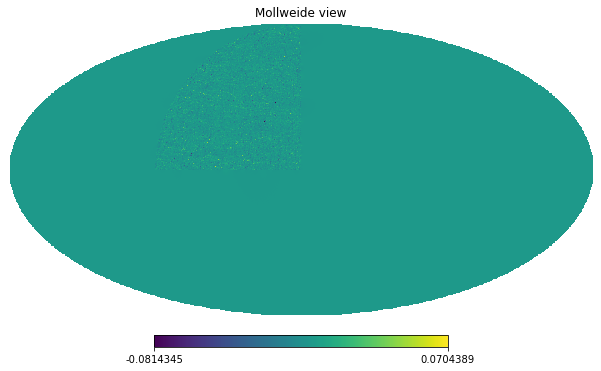

In [23]:
hp.mollview(hpmap_g1_front, nest=False)
plt.show()

